# L'étude d'un système chaotique
## Introduction

On cherche à étudier un certain exemple d'un système chaotique et son évolution en fonction du changement des conditions initiales. Pour faire cela on modélisera l'équation de la population de lapins $ x_{i+1} = r (1-x_i)x_i $, avec $x_i$ le rapport entre la population $n_i$ et la population maximale $n_{max}$ à une génération donnée, et $r$ le taux de croissance (paramètre).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")  # Utilisation du style "dark background" pour les graphiques
imsize = 300  # Taille de l'image par résolution à 300 dpi

n = np.arange(0, 400, 1)  # Définition de la variable n avec les valeurs entières de 0 à 400 avec un pas de 1
r = np.linspace(2.5, 4, 10000)  # Définition de la variable r avec 10000 valeurs séparée uniformément entre 2.5 et 4
r_graph = np.arange(2.5, 4.5, 0.5)  # Définition de la variable r_graph avec des valeurs entières entre 2.5 et 4 avec un pas de 0.5
r_labels = np.array((r"$r = 2.5$", r"$r = 3$", r"$r = 3.5$", r"$r = 4.5$"))  # Définition des étiquettes pour les différents r pour la légende du premier graphique
lims = np.array((0.6, 0.642, 0.69, 0.382, 0.5, 0.827, 0.875))  # Définition des limites pour la population de lapins pour grands n

## Visualisation de la fonction

Dans cette partie on cherche à visualiser l'évolution de notre rapport en fonction des $r$ différents afin d'estimer les points critiques de la dépendance sur ce paramètre. Pour faire cela on fait un graphique les 100 premières valeurs de $x$ pour les $r$ différents.

Ce premier graphique montre la population de lapins en fonction de $n$ générations, à différents taux de croissance ($r$). Le graphique démontre comment la population de lapins croît, ainsi que son comportement asymptotique à grandes valeurs de $n$, avec différents taux de croissance. Plus le taux de croissance augmente, plus la croissance de la population admet de limites (les lignes pointillées). 

On voit que les trois premières valeurs de $r$ admet des limites ({$l = ${$0.6$} | $r = 2.5$}, {$l = ${$6.4, 6.9$} | $r = 3$}, etc.) mais après $r=4$ on n'arrive plus à identifier les limites

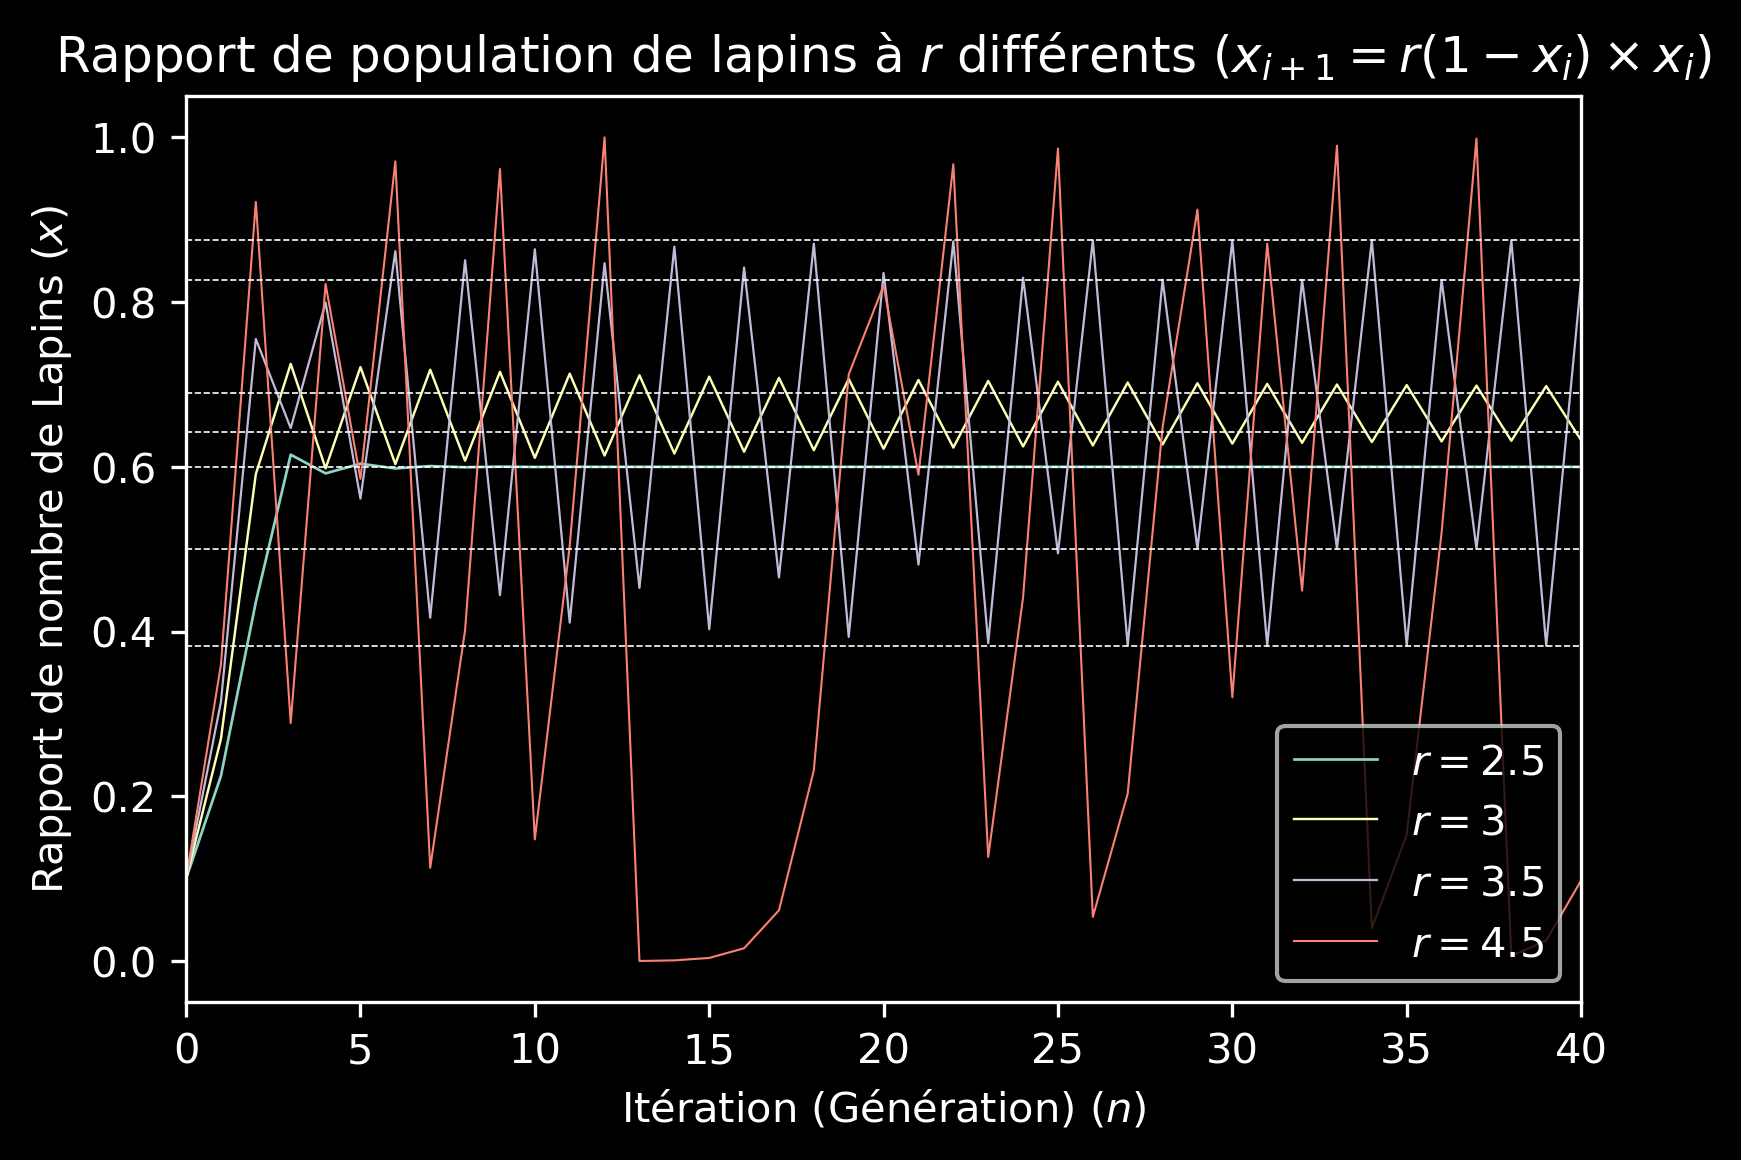

In [2]:
def f(a, x0=0.1):  # Définition de la fonction pour la population de lapins
    x = np.zeros(len(n))  # Définition d'un array de zéros
    for i in range(len(n)):  # Boucle qui calcule les termes de la suite pour chaque valeur de n
        if i == 0:
            x[i] = x0  # La première valeur de x est définie à 0.1
        else:
            x[i] = x[i - 1] * (1 - x[i - 1]) * a  # La valeur de x[i] est déterminée en utilisant la formule
    return x  # Retourne la variable x


# Définition de la figure avec la taille d'image
plt.figure(dpi=imsize)

# Boucle pour tracer de la courbe de la population de lapins pour chaque r_graph
for j in range(len(r_graph)):
    plt.plot(n[:100], f(r_graph[j])[:100], linewidth=1/(r_graph[j])+0.25, label= r_labels[j])

for e in range(len(lims)):
    # Tracé de lignes horizontales en pointillé pour les limites
    plt.plot(n[:100], lims[e] * np.ones(100), "w", linestyle="dashed", linewidth=0.4)

# Ajout d'une légende
plt.legend()

# Ajout d'un titre
plt.title(r"Rapport de population de lapins à $r$ différents ($x_{i+1} = r(1-x_i)\times x_i$)")

# Ajout des titres des axes
plt.xlabel(r"Itération (Génération) ($n$)")
plt.ylabel(r"Rapport de nombre de Lapins ($x$)")

plt.xlim(0,40)

plt.show()

## Étude des limites de la fonction

Le graphique ci-dessous (diagramme de bifurcation) montre la limite de la population de lapins en fonction du taux de croissance. Chaque point sur le graphique représente la population à long terme, donc la limite de la suite, en prenant les 100 derniers termes de 400 itérations pour une valeur de $r$ fixe. On constate que le nombre de limites double sur les intervalles exponontiellement décroissants de $r$ (les bifurcations), c'est à dire que la suite devient moins stable. On observe, par exemple, une limite pour $r<3$, deux limites pour $3<r<3.45$, quatres limites pour $3.45<r<3.56$. Pour $r>3.56$ on observe le comportement chaotique de notre système car on n'est plus capable d'identifier les différentes limites.

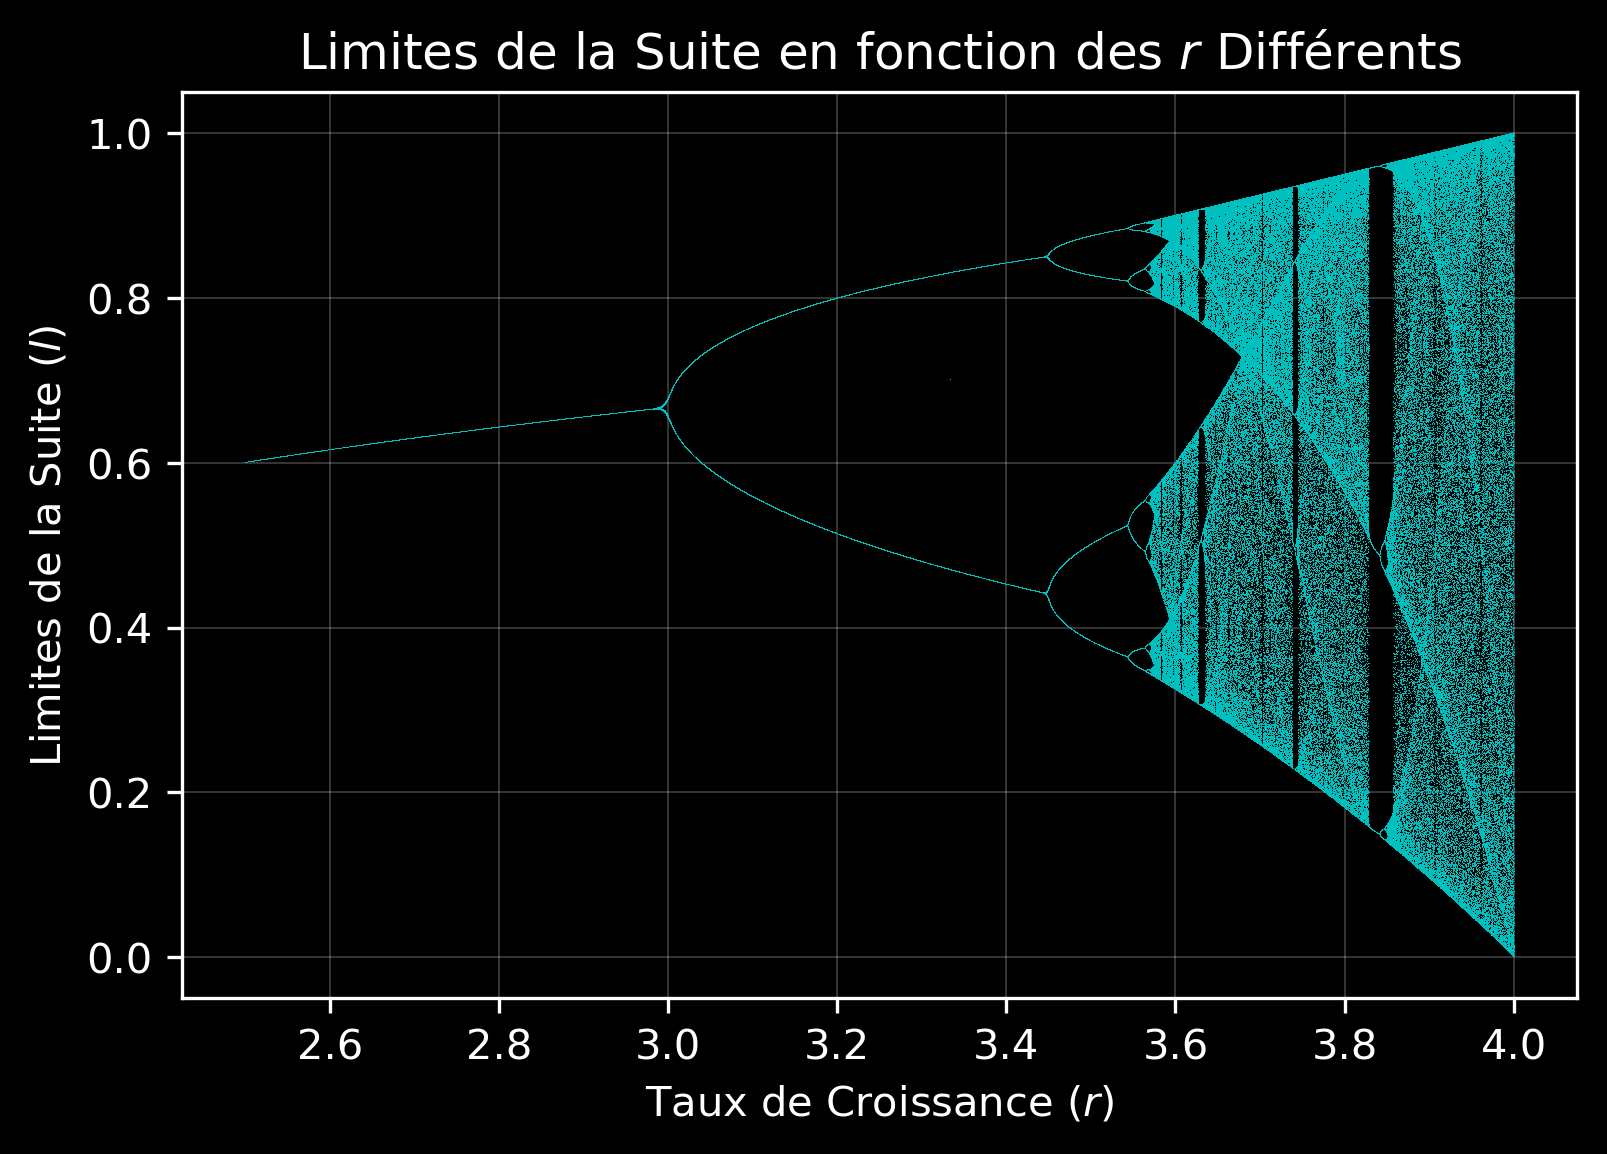

In [3]:
# Définition de la deuxième figure
plt.figure(dpi=imsize)

# Boucle pour prendre les 100 dernières valeurs de r et tracer les valeurs de la suite correspondantes (les dernières pour simuler des limites)
for k in range(len(r)):
    r_plot = r[k] * np.ones_like(f(r[k])[-100:])
    plt.plot(r_plot, f(r[k])[-100:], ",c", markersize=0.4)

# Ajout d'une grille
plt.grid(which="both", linewidth=0.1)

# Ajout d'un titre
plt.title(r"Limites de la Suite en fonction des $r$ Différents")

# Ajout des titres des axes
plt.ylabel(r"Limites de la Suite ($l$)")
plt.xlabel(r"Taux de Croissance ($r$)")

plt.show()

Maintenant on étudiera la dépendence de notre système sur le paramètre $x_0$ en tracant ce même diagramme de bifurcation pour plusieurs valeurs de $x_0$ et les comparer entre-eux.

On voit sur les trois diagrammes que les bifurcation ont lieu aux mêmes points de $r$. On en déduit que ce système n'est pas sensible au paramètre $x_0$.


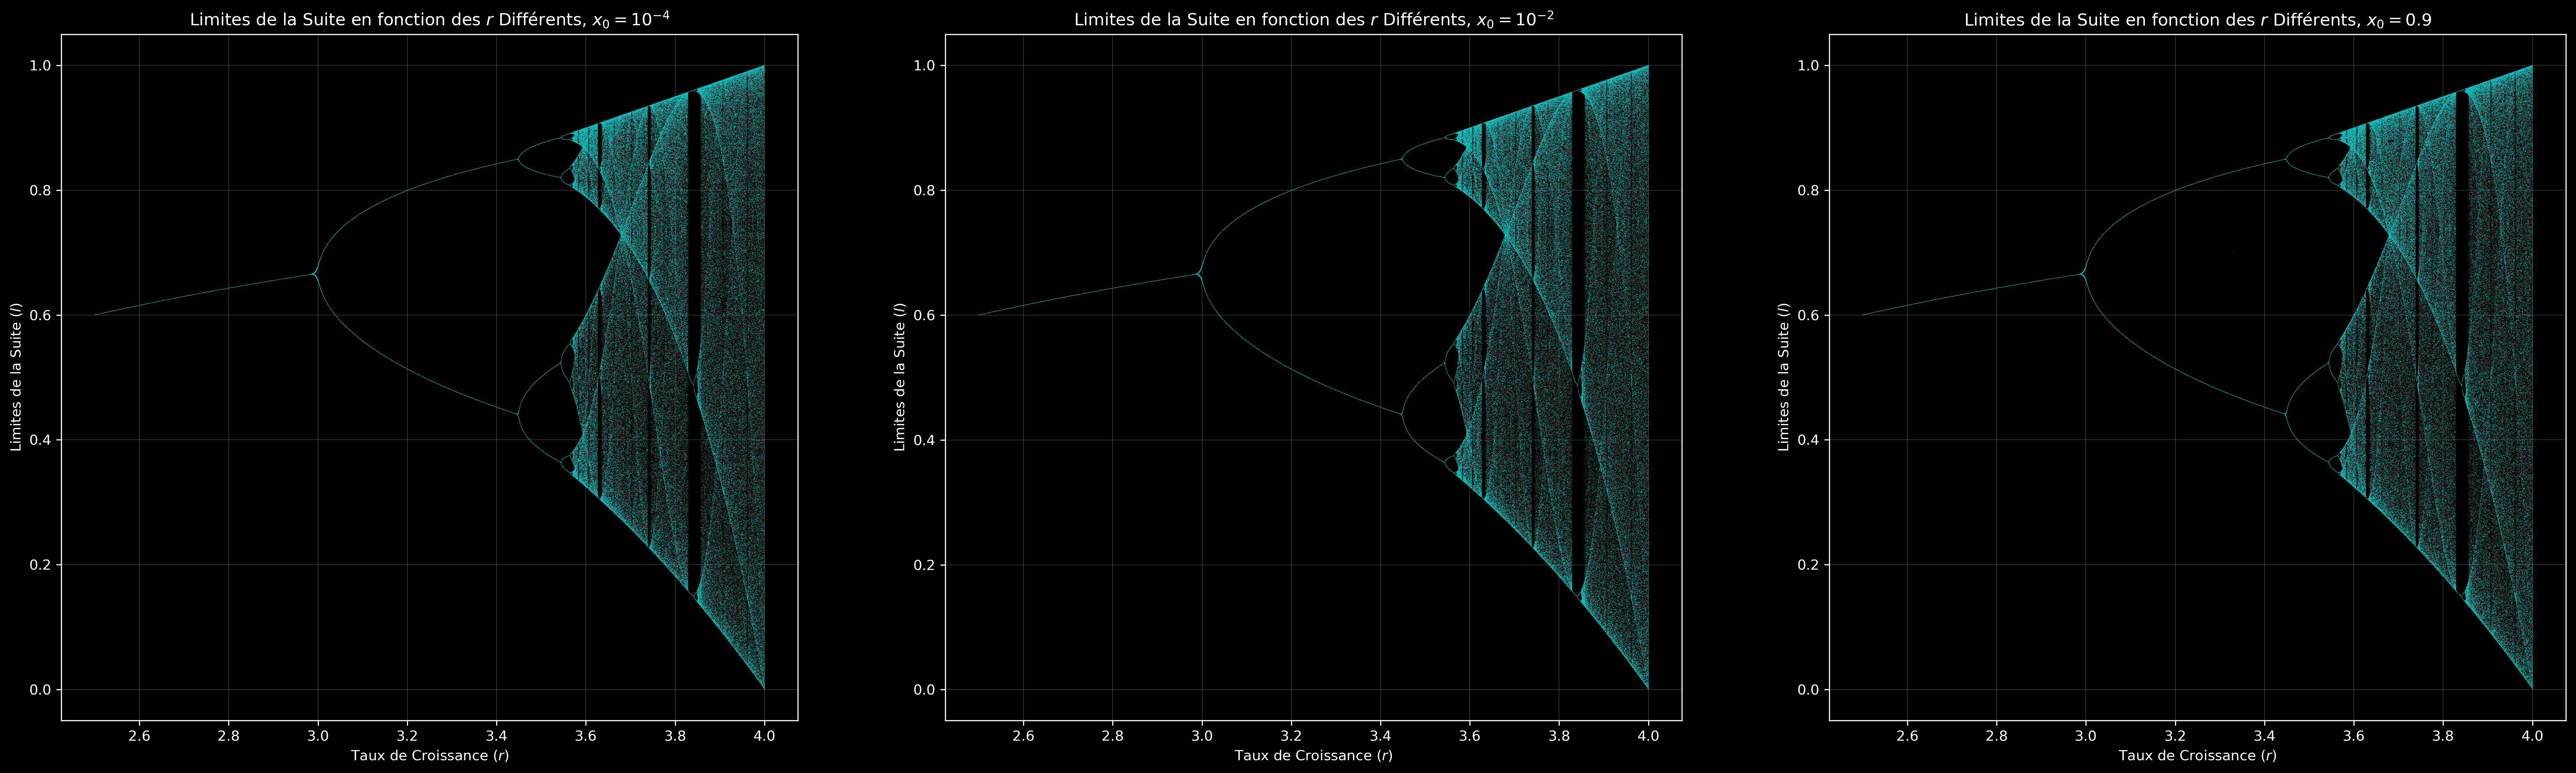

In [4]:
# Définition de la deuxième figure

plt.figure(figsize = (32, 9), dpi = imsize)

# Boucle pour prendre les 100 dernières valeurs de r et tracer les valeurs de la suite correspondantes (les dernières pour simuler des limites)
plt.subplot(1, 3, 1, title = r"Limites de la Suite en fonction des $r$ Différents, $x_0 = 10^{-4}$")
for k in range(len(r)):
    r_plot = r[k] * np.ones_like(f(r[k])[-100:])
    plt.plot(r_plot, f(r[k], x0 = 0.0001)[-100:], ",c", markersize=0.4)

# Ajout d'une grille
plt.grid(which="both", linewidth=0.1)

# Ajout des titres des axes
plt.ylabel(r"Limites de la Suite ($l$)")
plt.xlabel(r"Taux de Croissance ($r$)")

# Définition de la deuxième figure
plt.subplot(1, 3, 2, title = r"Limites de la Suite en fonction des $r$ Différents, $x_0 = 10^{-2}$")

# Boucle pour prendre les 100 dernières valeurs de r et tracer les valeurs de la suite correspondantes (les dernières pour simuler des limites)
for k in range(len(r)):
    r_plot = r[k] * np.ones_like(f(r[k])[-100:])
    plt.plot(r_plot, f(r[k], x0 = 0.01)[-100:], ",c", markersize=0.4)

# Ajout d'une grille
plt.grid(which="both", linewidth=0.1)

# Ajout des titres des axes
plt.ylabel(r"Limites de la Suite ($l$)")
plt.xlabel(r"Taux de Croissance ($r$)")

# Définition de la deuxième figure
plt.subplot(1, 3, 3, title = r"Limites de la Suite en fonction des $r$ Différents, $x_0 = 0.9$")

# Boucle pour prendre les 100 dernières valeurs de r et tracer les valeurs de la suite correspondantes (les dernières pour simuler des limites)
for k in range(len(r)):
    r_plot = r[k] * np.ones_like(f(r[k])[-100:])
    plt.plot(r_plot, f(r[k], x0 = 0.9)[-100:], ",c", markersize=0.4)

# Ajout d'une grille
plt.grid(which="both", linewidth=0.1)

# Ajout des titres des axes
plt.ylabel(r"Limites de la Suite ($l$)")
plt.xlabel(r"Taux de Croissance ($r$)")

plt.show()

## Étude de la stabilité du systeme chaotique

Le troisième graphique représente l'analyse de la stabilité d'un système chaotique en fonction d'un changement des conditions initiales.

Ce graphique est important dans l'étude des systèmes chaotiques car il permet de visualiser les propriétés du système. L'exposant est croissant entre $r=2.5$ et $r=3$, et decroissant entre $r=3$ et $r=3.4$. Ce phénomène se répète plusieures fois sur l'intervalle. On en déduit que cette fonction admet des maximums locaux, et on voit en comparant les deux derniers graphiques que ces maximums (à $\lambda=0$) indique des bifurcations. On constate également que le système est convergant et donc stable pour les valeurs de $\lambda<0$.

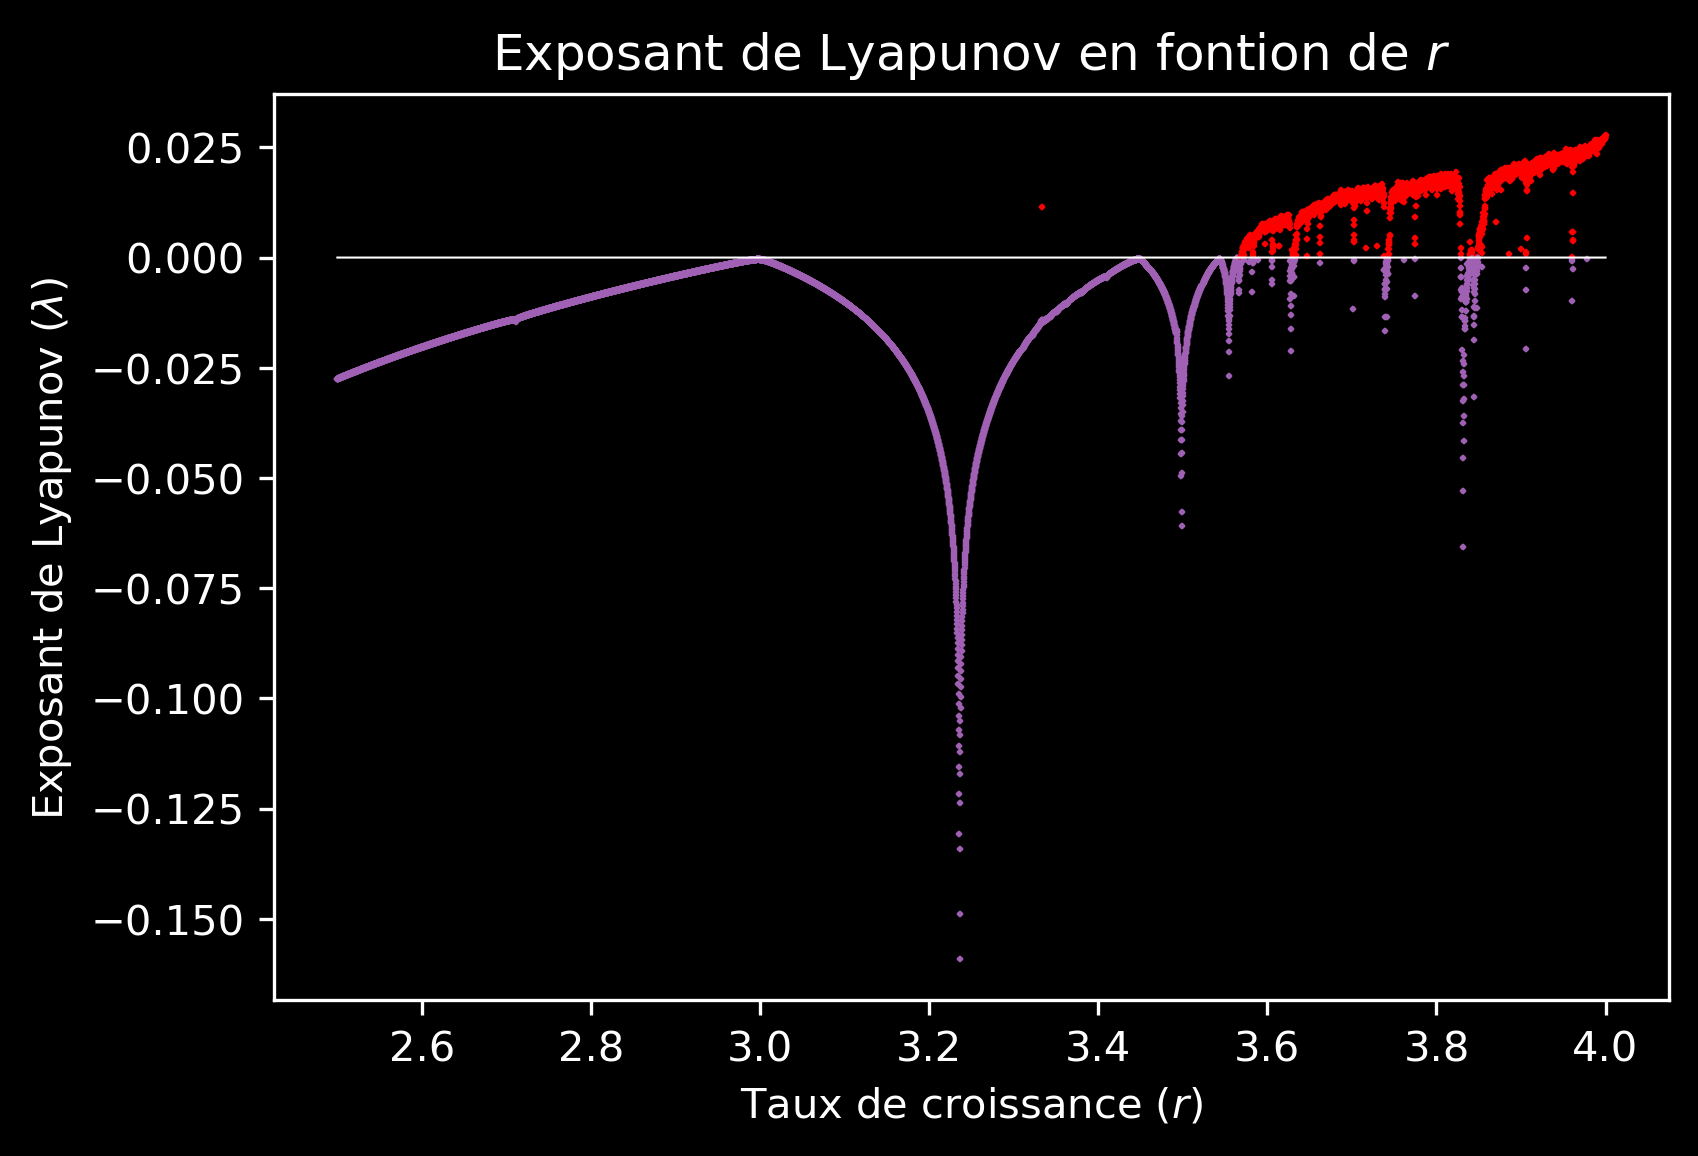

In [5]:
def f_prime(a): # Calcul de la dérivée de la fonction pour chaque valeur de x
    x1 = np.ones_like(f(a))
    x1 = -2 * a * f(a) + a
    return x1

def coeff(a, N): # On calcule l'exposant de Lyapunov
    return np.sum( np.log( np.abs( f_prime(a) ) ) )/N

# Définition de la troisième figure
plt.figure(dpi=imsize)

for h in range(len(r)): # On trace l'exposant de Lyapunov
    # En rouge si la valeur est positive
    if coeff(r[h], len(r)) > 0:
        plt.plot(r[h], coeff(r[h], len(r)), "rx", markersize = 1)
    else:
        # En violet si la valeur est négative
        plt.plot(r[h], coeff(r[h], len(r)), "x", color="#A061B4", markersize = 1)
# On ajoute une ligne blanche à lambda = 0
plt.plot(r, np.zeros_like(r), "w", linewidth = 0.5)
plt.title(r"Exposant de Lyapunov en fontion de $r$")
plt.xlabel(r"Taux de croissance ($r$)")
plt.ylabel(r"Exposant de Lyapunov ($\lambda$)")
plt.show()

## Conclusion

Tout compte fait on observe que le système étudié a des comportement chaotique. Il est très sensible au paramètre $r$ mais plutot stable pour $x_0$. On a pu déduire les valeurs pour lesquelles l'équation admet des limites précises ainsi que celles pour lesquelles le résultat devient difficile à prédire. On a pu quantifié ces comportements grâce aux modeles et hypothèses employés.